# 机器学习纳米学位毕业项目报告

## 基于语音识别的性别识别

## 分析数据

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# 读入数据
data = pd.read_csv("voice.csv")
print ("data read successfully.")
data.head()

data read successfully.


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [192]:
data.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


In [175]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [176]:
print ('Total number of samples:{}'.format(data.shape[0]))
print ('Total number of male:{}'.format(data[data.label == 'male'].shape[0]))
print ('Total number of female:{}'.format(data[data.label == 'female'].shape[0]))

Total number of samples:3168
Total number of male:1584
Total number of female:1584


### 可视化数据

将特征两两配对，查看性别关于所有特征对的分布。将分布图保存在figure的文件夹下。

In [177]:
import os

def show_relevence():
    # 以两个特征为一组查看样本分布
    data = pd.read_csv("voice.csv")
    female = data[data.label == 'female']
    male = data[data.label == 'male']
    indices = list(data.drop(['label'], axis=1).columns)
    if not os.path.exists('figure'):
        os.mkdir('figure')
    for feature_x in indices:
        for feature_y in indices[indices.index(feature_x):]:
            plt.figure(figsize=(8,6))
            X = male[feature_x]
            Y = male[feature_y]
            plt.scatter(X, Y, c='orange', label='male', alpha = 0.8)
            
            X = female[feature_x]
            Y = female[feature_y]
            plt.scatter(X, Y, c='blue', label='female', alpha = 0.2)
            
            plt.xlabel(feature_x)
            plt.ylabel(feature_y)
            plt.legend(loc='upper right')
            #plt.show()            
            plt.savefig('figure/{}-{}.png'.format(feature_x, feature_y))
            
        break

        

# 函数会输出很多张图，慎用。        
#show_relevence()

## 数据预处理

In [193]:
from sklearn.utils import shuffle

# 打乱原始数据顺序
data = shuffle(data, random_state=0)

gender = data.label
features = data.drop(['label'], axis=1)
print ("data is ready.")

data is ready.


### 标准化数据

In [194]:
from sklearn.preprocessing import StandardScaler

def standard_data(data):
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler.transform(data)

features = standard_data(features)
print ("data has been standarded.")

data has been standarded.


### 划分训练集和测试集

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
        train_test_split(features, gender, train_size = 0.80, random_state = 0)
print "Training and testing split was successful"

Training and testing split was successful


## 训练模型

In [146]:
from sklearn.metrics import accuracy_score


def train_clf(clf, X_train, y_train):
    clf.fit(X_train,y_train)
    print "Classifier trained successfully."

def predict_labels(clf, features):
    y_pred = clf.predict(features)
    return y_pred
    
def train_predict(clf, X_train, y_train, X_test, y_test):
    
    # 输出训练器名称
    print "Classifier：{}....".format(clf.__class__.__name__)
    
    # 训练一个分类器
    train_clf(clf, X_train, y_train)
    
    # 输出训练集和训练集预测结果
    print "Accuracy for train set: {}".format(accuracy_score(y_train, predict_labels(clf, X_train)))
    print "Accuarcy for test set: {}".format(accuracy_score(y_test, predict_labels(clf, X_test)))


### 简单模型

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

clf_A = RandomForestClassifier()
clf_B = DecisionTreeClassifier()
clf_C = svm.SVC()

for clf in clf_A, clf_B, clf_C:
    train_predict(clf, X_train, y_train, X_test, y_test)

Classifier：RandomForestClassifier....
Classifier trained successfully.
Accuracy for train set: 0.997632202052
Accuarcy for test set: 0.973186119874
Classifier：DecisionTreeClassifier....
Classifier trained successfully.
Accuracy for train set: 1.0
Accuarcy for test set: 0.958990536278
Classifier：SVC....
Classifier trained successfully.
Accuracy for train set: 0.98500394633
Accuarcy for test set: 0.984227129338


结果显示，支持向量机训练效果最好，随机森林其次，决策树第三。因为数据预处理都是以调试支持向量机为目地，所以支持向量机表现要比其他两种学习算法好。

## 调试支持向量机模型

### 对比核函数对模型影响

In [148]:
from sklearn.cross_validation import cross_val_score

# 核函数列表
kernels = ['linear', 'rbf', 'poly']
acc_score = []
for k in kernels:
    svc= svm.SVC(kernel=k)
    scores = cross_val_score(svc, features, gender, cv=5 ,scoring='accuracy')
    acc_score.append(np.mean(scores))

# 输出各个核函数得分
print ('The accuracy of SVM with linear kernel: '), acc_score[0] 
print ('The accuracy of SVM with rbf kernel: '), acc_score[1]
print ('The accuracy of SVM with poly kernel: '), acc_score[2]  

The accuracy of SVM with linear kernel:  0.973487601326
The accuracy of SVM with rbf kernel:  0.981378029789
The accuracy of SVM with poly kernel:  0.958969572336


### 调试参数C

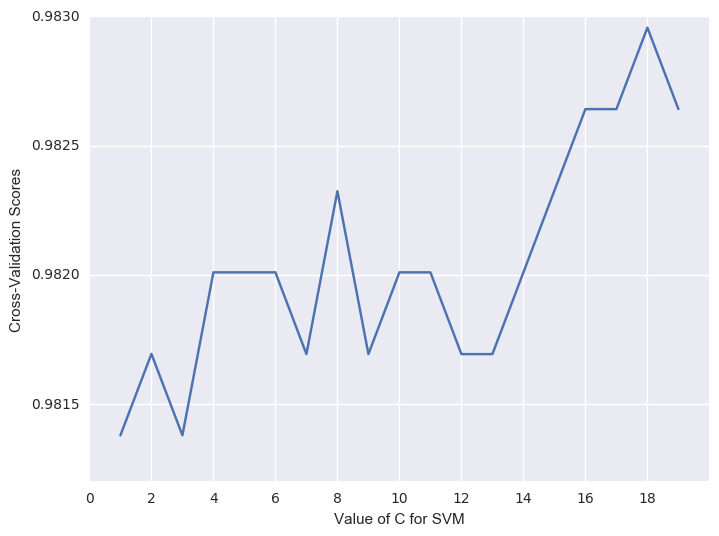

In [149]:
%matplotlib inline

from sklearn.cross_validation import cross_val_score

# C的取值范围
c_range = np.arange(1, 20)
acc_score = []
for c in c_range:
    svc=svm.SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, features, gender, cv=5, scoring='accuracy') #cv is cross validation
    acc_score.append(np.mean(scores))
        
# 显示准确率和C的关系
plt.figure(figsize=(8,6))
plt.plot(c_range, acc_score)
plt.xticks(np.arange(0, 20, 2))
plt.xlabel("Value of C for SVM")
plt.ylabel("Cross-Validation Scores")
plt.show()

   从图中可以看出，准确率随着参数C的增大而增大。参数C取值在18左右是准确率达到最大。此时准确率大约为98.30%。接下来将参数C的取值缩小到17.0到19.0之间查看准确率的变化情况。

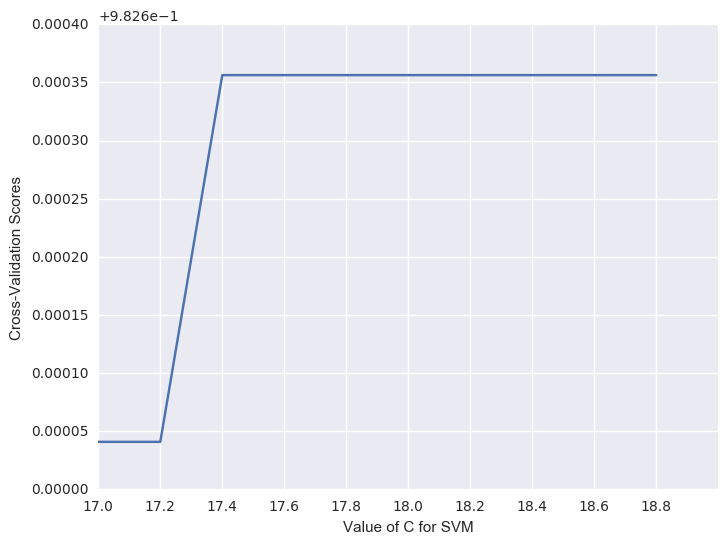

In [200]:
%matplotlib inline

# C的取值范围
c_range = np.arange(17.0, 19.0, 0.2)
acc_score = []
for c in c_range:
    svc=svm.SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, features, gender, cv=5, scoring='accuracy') #cv is cross validation
    acc_score.append(np.mean(scores))

# 显示准确率和C的关系
plt.figure(figsize=(8, 6))
plt.plot(c_range, acc_score)
plt.xticks(c_range)
plt.xlabel("Value of C for SVM")
plt.ylabel("Cross-Validation Scores")
plt.show()

参数C在17.4时，模型准确率最高。

### 调试参数gamma

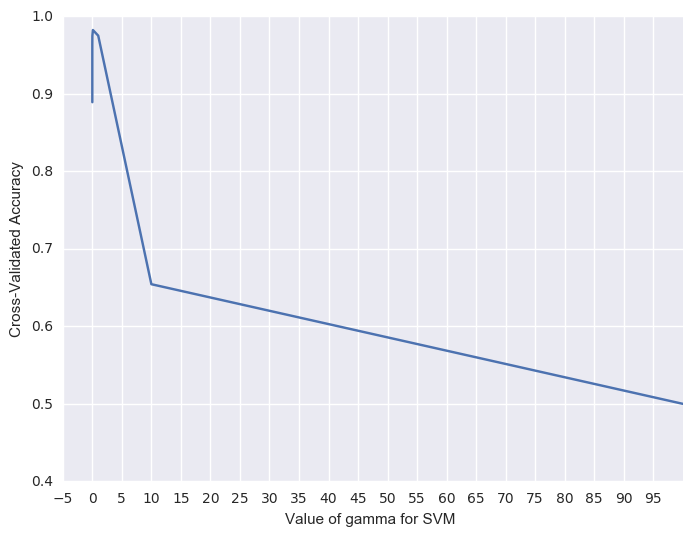

In [155]:
%matplotlib inline

# gamma参数列表
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score = []

for gamma in gamma_range:
    svc = svm.SVC(kernel='rbf', gamma=gamma)
    scores = cross_val_score(svc, features, gender, cv = 5, scoring='accuracy')
    acc_score.append(np.mean(scores))

# 显示准确率和gamma之间的关系
plt.figure(figsize=(8, 6))
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVM ')
plt.xticks(np.arange(-5, 100, 5))
plt.ylabel('Cross-Validated Accuracy')
plt.show()

当gamma取值在0.1左右时，准确率达到最高。接下来将gamma取值限制在0.01到0.15之间，查看准确率。

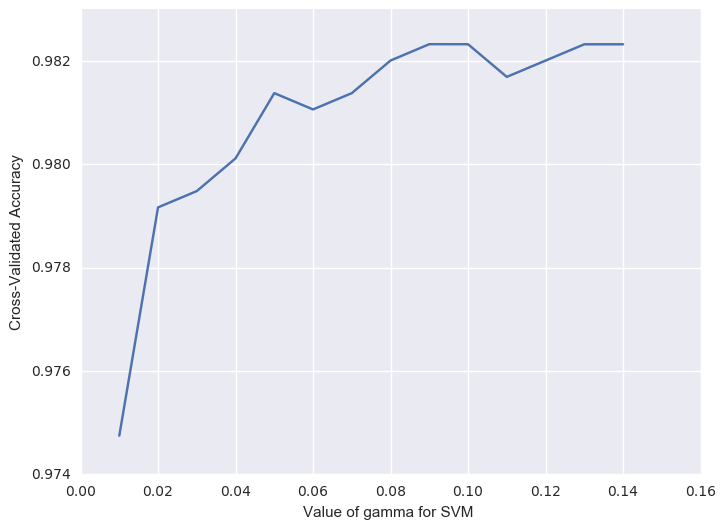

In [156]:
%matplotlib inline

# gamma参数列表
gamma_range = np.arange(0.01, 0.15, 0.01)
acc_score = []
for gamme in gamma_range:
    svc = svm.SVC(kernel='rbf', gamma=gamme)
    scores = cross_val_score(svc, features, gender, cv = 5, scoring='accuracy')
    acc_score.append(np.mean(scores))

# 显示准确率与gamma的关系
plt.figure(figsize=(8, 6))
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVM ')
#plt.xticks(np.arange(-5, 100, 5))
plt.ylabel('Cross-Validated Accuracy')
plt.show()

从图中可以看出,准确率随着参数gamma增大而增大，在gamma等于0.10时达到最大值。此时准确率约为98.20%

### 同时调试多个参数

In [195]:
from sklearn.grid_search import GridSearchCV

# 参数字典
params = tuned_parameters = {
 'C': (np.arange(0.1,1.0,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(15.5,18.5,0.5)) , 'gamma': np.arange(0.01, 0.20, 0.05), 'kernel': ['rbf']
}
grid_obj = GridSearchCV(estimator=clf,
                param_grid=params,
                scoring='accuracy',
                cv=5)
grid_obj.fit(features, gender)
clf = grid_obj.best_estimator_

print ('The best model parameters: '), grid_obj.best_params_
print ('The best model score: '), grid_obj.best_score_

The best model parameters:  {'kernel': 'rbf', 'C': 16.0, 'gamma': 0.060000000000000005}
The best model score:  0.98327020202


### 学习曲线

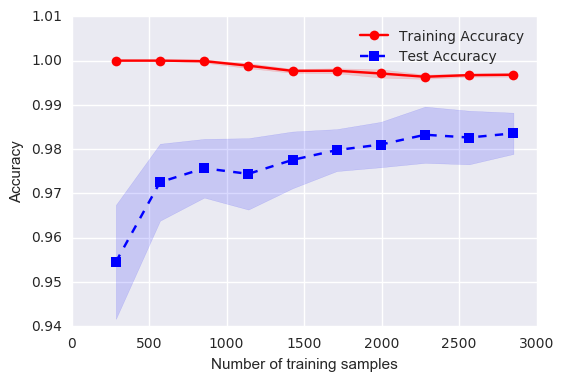

In [196]:
from sklearn.model_selection import learning_curve

%matplotlib inline

def show_learning_curve(clf, X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(estimator=clf,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10)

    # 训练集集平均准确率
    train_mean = np.mean(train_scores, axis=1)

    # 训练集方差
    train_std = np.std(train_scores, axis=1)

    # 测试集平均准确率和方差
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # 训练集曲线设置
    plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
    # 训练集曲线范围
    plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

    # 测试集曲线设置
    plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
    plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
show_learning_curve(clf,features, gender)

### 收集被错误预测的样本

In [197]:
clf = grid_obj.best_estimator_
pred = clf.predict(features)
wrong_pred = gender[pred != gender]
wrong_samples = []

# 将错误预测的样本加入wrong_pred
for i in wrong_pred.index:   
    row = data.loc[i]
    row['label'] = row['label'] + ' in SVM'
    wrong_samples.append(row)
            
pd.DataFrame(wrong_samples).to_csv('wrong_pred.csv')

print ('wrong data has been collected.')

d:\Users\Hp\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


wrong data has been collected.


### 可视化异常分类样本的分布

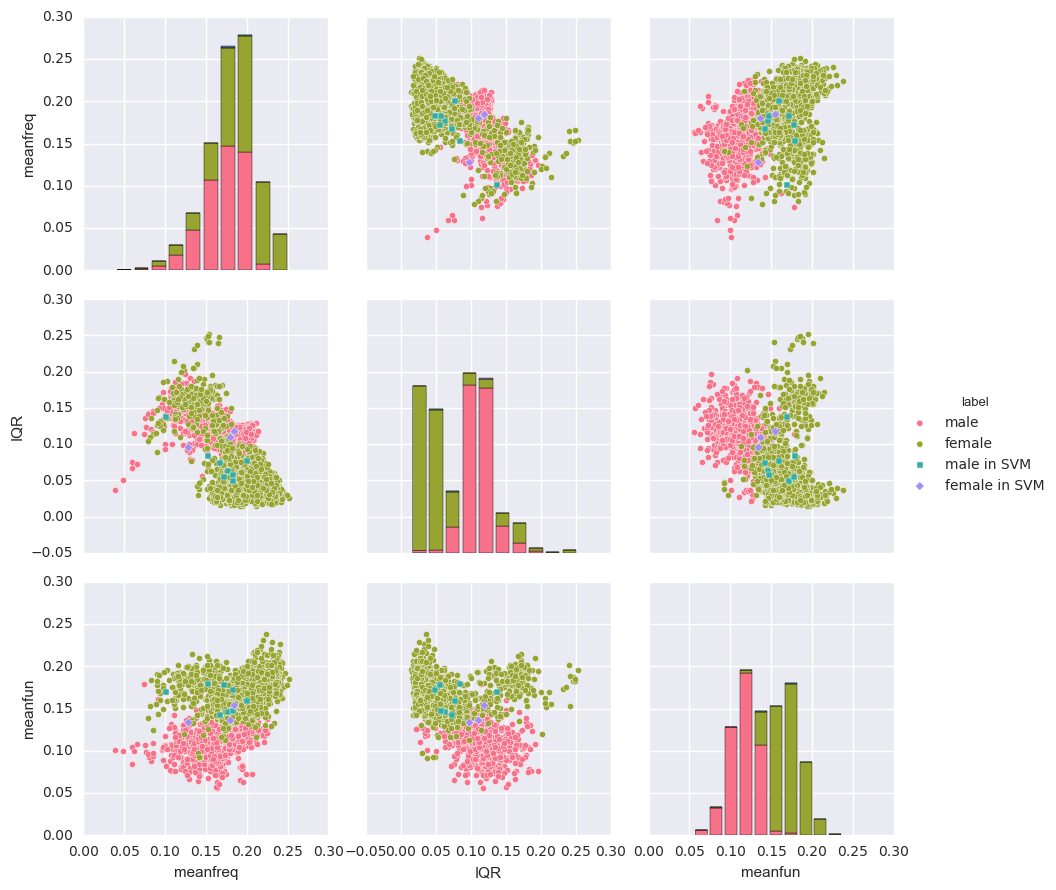

In [198]:
import seaborn

%matplotlib inline

# 合并原始样本和异常分类样本
data = pd.read_csv("voice.csv")
wrong_data = pd.read_csv("wrong_pred.csv")
data = pd.concat([data, wrong_data])

gender = data.label
features = data.drop(['label'], axis=1)
seaborn.pairplot(data[['meanfreq', 'IQR', 'meanfun', 'label']], 
            hue='label', palette="husl", markers=["o", "o", "s", "D"], size=3)
plt.show()

###### 输出最优模型在交叉验证上的准确率

In [199]:
# 获取最优模型
clf = svm.SVC(kernel='rbf', C=1.3, gamma=0.2)

data = pd.read_csv("voice.csv")
data = shuffle(data, random_state=0)
features = data.drop(['label'], axis=1)
gender = data.label
features = standard_data(features)
scores = cross_val_score(clf, features, gender, cv = 5, scoring='accuracy')

print ('Accuracy of the best model by cross_val_score:', np.mean(scores))

('Accuracy of the best model by cross_val_score:', 0.98358822824741454)
